# Импорт библиотек

In [30]:
import numpy as np
import polars as pl
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Загрузка данных

In [31]:
lf = pl.scan_csv('data/train.csv')

# Анализ типов данных в колонках

In [32]:
# Получение схемы данных

lf.collect_schema()

Schema([('row_id', Int64),
        ('timestamp', Int64),
        ('user_id', Int64),
        ('content_id', Int64),
        ('content_type_id', Int64),
        ('task_container_id', Int64),
        ('user_answer', Int64),
        ('answered_correctly', Int64),
        ('prior_question_elapsed_time', Float64),
        ('prior_question_had_explanation', Boolean)])

In [33]:
# Получение первых 5 строк

lf.head().collect()

row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
i64,i64,i64,i64,i64,i64,i64,i64,f64,bool
0,0,115,5692,0,1,3,1,null,null
1,56943,115,5716,0,2,2,1,37000.0,false
2,118363,115,128,0,0,0,1,55000.0,false
3,131167,115,7860,0,3,0,1,19000.0,false
4,137965,115,7922,0,4,1,1,11000.0,false


In [34]:
# Количество уникальных элементов в колонках

lf.select(pl.all().approx_n_unique()).collect(streaming=True)

row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
100887649,72894331,390688,13670,2,10013,5,3,3253,3


In [35]:
# Вывод уникальных данных из колонки content_type_id

lf.select('content_type_id').unique().collect(streaming=True)

content_type_id
i64
1
0


In [36]:
# Вывод уникальных данных из колонки user_answer

lf.select('user_answer').unique().collect(streaming=True)

user_answer
i64
-1
2
3
1
0


In [37]:
# Вывод уникальных данных из колонки answered_correctly

lf.select('answered_correctly').unique().collect(streaming=True)

answered_correctly
i64
-1
1
0


In [38]:
# Вывод уникальных данных из колонки prior_question_had_explanation

lf.select('prior_question_had_explanation').unique().collect(streaming=True)

prior_question_had_explanation
bool
null
false
true


In [39]:
# Количество NaN в колонках

lf.select(pl.all().null_count()).collect(streaming=True)

row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,2351538,392506


# Преобразование типов данных для снижения обьема используемой памяти

In [40]:
def reduce_memory_usage_pl(df, name):
    
    
    """ Функция, преобразующая типы данных на менее ресурсоемкие
    
    Args:
        df (DataFrame): датафрейм с данными
        name (str): название датафрейма
        
    Returns:
        df (DataFrame): датафрейм с данными
    """
        
        
    print(f"Memory usage of dataframe {name} is {round(df.estimated_size('mb'), 2)} MB")
    Numeric_Int_types = [pl.Int8,pl.Int16,pl.Int32,pl.Int64]
    Numeric_Float_types = [pl.Float32,pl.Float64]    
    for col in df.columns:
        col_type = df[col].dtype
        c_min = df[col].min()
        c_max = df[col].max()
        if col_type in Numeric_Int_types:
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                df = df.with_columns(df[col].cast(pl.Int8))
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                df = df.with_columns(df[col].cast(pl.Int16))
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                df = df.with_columns(df[col].cast(pl.Int32))
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                   df = df.with_columns(df[col].cast(pl.Int64))
        elif col_type in Numeric_Float_types:
            if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                df = df.with_columns(df[col].cast(pl.Float32))
            else:
                pass
        elif col_type == pl.Utf8:
            df = df.with_columns(df[col].cast(pl.Categorical))
        else:
            pass
    print(f"Memory usage of dataframe {name} became {round(df.estimated_size('mb'), 2)} MB")
    return df

lf = pl.read_csv('data/train.csv')

lf = reduce_memory_usage_pl(lf, 'df')


Memory usage of dataframe df is 6987.14 MB
Memory usage of dataframe df became 2642.8 MB


In [41]:
# Получение схемы данны преобразованного датафрейма

lf.schema

Schema([('row_id', Int32),
        ('timestamp', Int64),
        ('user_id', Int32),
        ('content_id', Int16),
        ('content_type_id', Int8),
        ('task_container_id', Int16),
        ('user_answer', Int8),
        ('answered_correctly', Int8),
        ('prior_question_elapsed_time', Float32),
        ('prior_question_had_explanation', Boolean)])

In [42]:

# Преобразование датафрейма в LazyFrame

lf = lf.lazy()

# Анализ данных в колонке timestamp

<Figure size 1200x600 with 0 Axes>

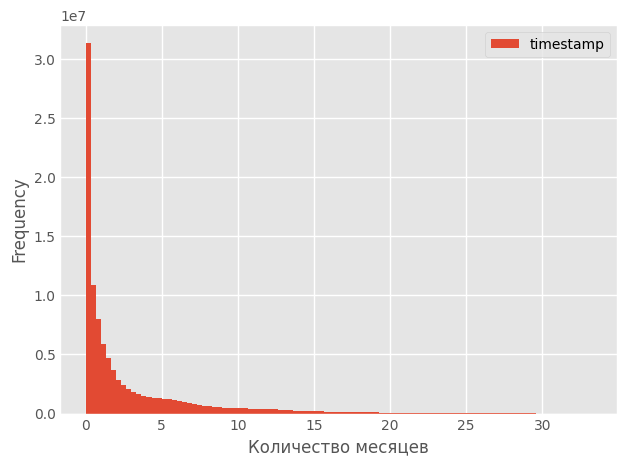

In [96]:
# Преобразование времени из миллисекунд в месяцы
# 1 год = 31536000000 ms

ts = lf.select('timestamp').collect(streaming=True) / (31536000000 / 12)

ts = ts.to_pandas()

# Построение гистограммы по количеству месяцев между событием и первым взаимодействием с системой

fig = plt.figure(figsize=(12,6))
ts.plot.hist(bins=100)
plt.xticks(rotation=0)
plt.xlabel("Количество месяцев")
plt.show()

In [44]:
# Сравнение количества строк со значением timestamp=0 и количеством уникальных пользователей

ds = lf.filter(
    pl.col('timestamp') == 0
).select(
    pl.col('timestamp').count().alias('timestamp_zeros'),
    pl.col('user_id').approx_n_unique().alias('unique_user_id')).collect(streaming=True)


In [45]:
ds

timestamp_zeros,unique_user_id
u32,u32
396417,390688


# Анализ колонки user_id

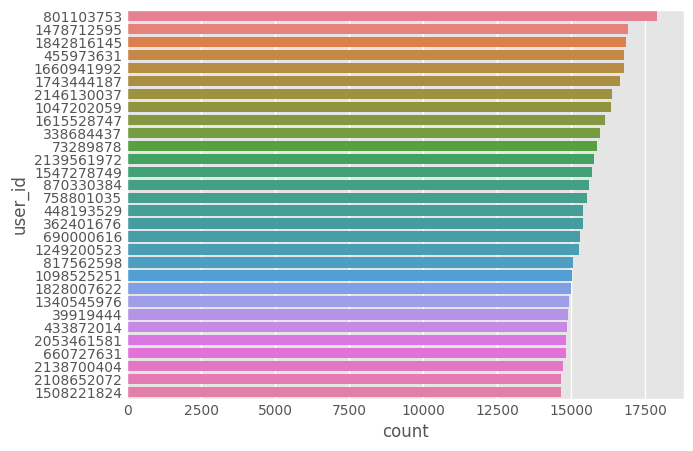

In [46]:
# Вывод данных по топ-30 ползователей

ds = lf.select('user_id').collect(streaming=True).to_series().value_counts().sort(by='count', descending=True)
ds = ds[:30]
ds = ds.cast({'user_id': pl.String})


sns.barplot(data=ds, x='count', y='user_id', hue='user_id')
plt.show()

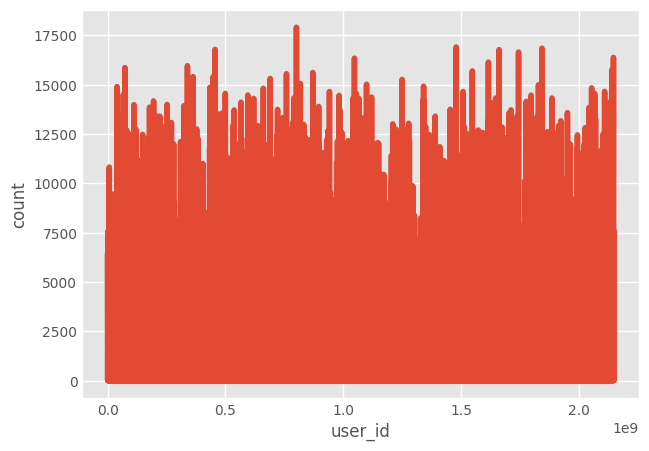

In [47]:
# Построение распределения количества взаимодействий с системой для разных пользователей

ds = lf.select('user_id').collect(streaming=True).to_series().value_counts().sort(by='user_id')
sns.lineplot(data=ds, x='user_id', y='count')
plt.show()

# Анализ колонки content_id

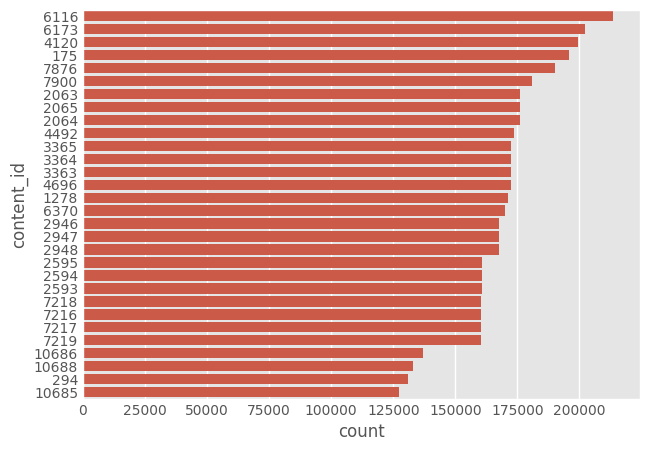

In [48]:
# Топ-30 по использованию образовательного контента

ds = lf.select('content_id').collect(streaming=True).to_series().value_counts().sort(by='count', descending=True)
ds = ds[:30]
ds = ds.cast({'content_id': pl.String})


sns.barplot(data=ds, x='count', y='content_id')
plt.show()

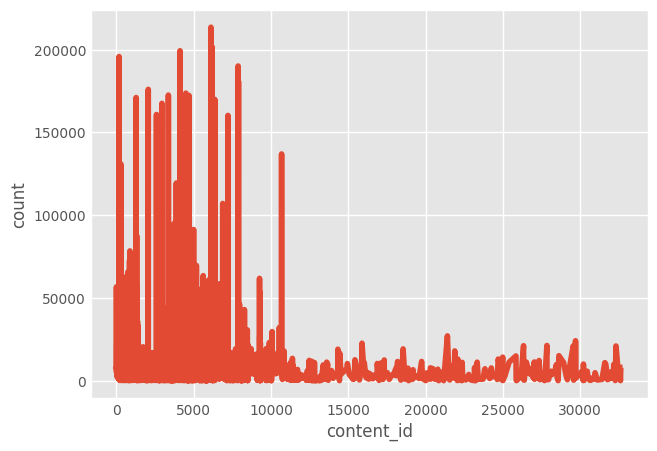

In [57]:
# Распределение по параметру content_id

ds = lf.select('content_id').collect(streaming=True).to_series().value_counts().sort(by='content_id')
sns.lineplot(data=ds, x='content_id', y='count')
plt.show()

# Анализ колонки content_type_id

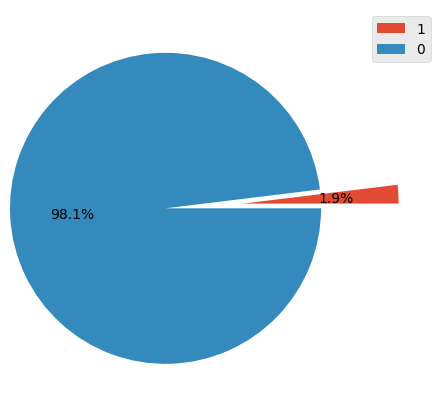

In [62]:
# Анализ распределения по типам контента

ds = lf.select('content_type_id').collect(streaming=True).to_series().value_counts()
num_rows = len(lf.select('content_type_id').collect())
ds = ds.with_columns(
    pl.col('count') / num_rows
)
x = ds.select('count').to_series()
legend = ds.select('content_type_id').to_series()
explode = [0, 0.5]

# Построение pie chart. В легенде 0 - тест, 1 - лекция

plt.pie(x, autopct='%1.1f%%', explode=explode)
plt.legend(legend)
plt.show()


# Анализ метаданных

In [63]:
questions = pl.read_csv('data/questions.csv')
questions.head()

question_id,bundle_id,correct_answer,part,tags
i64,i64,i64,i64,str
0,0,0,1,"""51 131 162 38"""
1,1,1,1,"""131 36 81"""
2,2,0,1,"""131 101 162 92"""
3,3,0,1,"""131 149 162 29"""
4,4,3,1,"""131 5 162 38"""


In [64]:
lectures = pl.read_csv('data/lectures.csv')
lectures.head()

lecture_id,tag,part,type_of
i64,i64,i64,str
89,159,5,"""concept"""
100,70,1,"""concept"""
185,45,6,"""concept"""
192,79,5,"""solving question"""
317,156,5,"""solving question"""


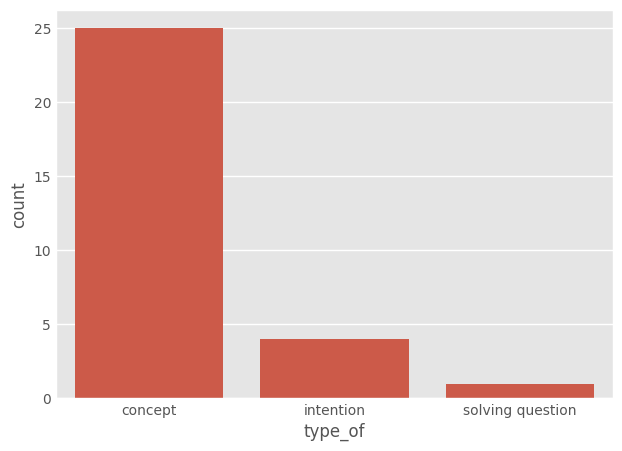

In [75]:
# Просмотр топ-30 лекций по их типу

ds = lf.filter(
    pl.col('content_type_id') == 1
).select(
    pl.col('content_id')
    ).collect(streaming=True).to_series().value_counts().sort(by='count', descending=True)

row_keys = ds[:30].select('content_id').to_series()

df = lectures.filter(
    pl.col('lecture_id').is_in(row_keys)
    ).select(
        pl.all())

data = df.select('type_of').to_series().value_counts()

sns.barplot(data=data, x='type_of', y='count')
plt.show()

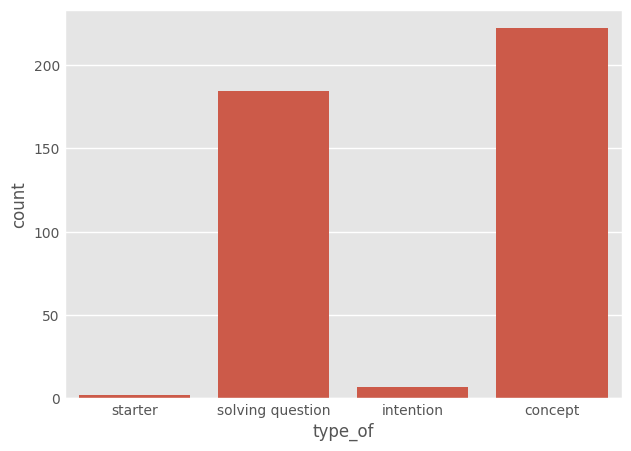

In [76]:
# Распределение лекций по типам

row_keys = ds.select('content_id').to_series()

df = lectures.filter(
    pl.col('lecture_id').is_in(row_keys)
    ).select(
        pl.all())

data = df.select('type_of').to_series().value_counts()

sns.barplot(data=data, x='type_of', y='count')
plt.show()

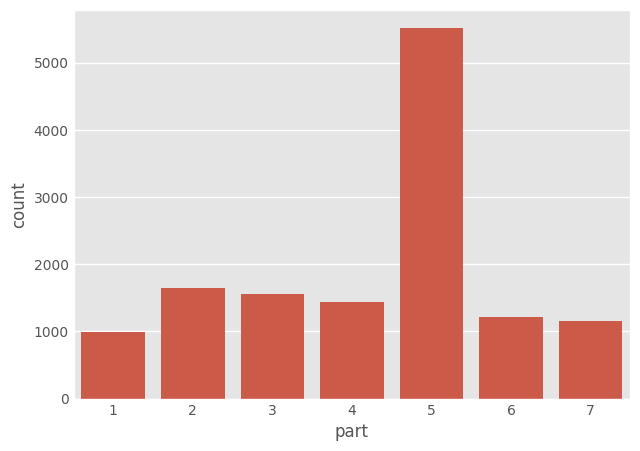

In [77]:
# Распределение вопросов по разделам

ds = questions.select('part').to_series().value_counts()

sns.barplot(data=ds, x='part', y='count')
plt.show()

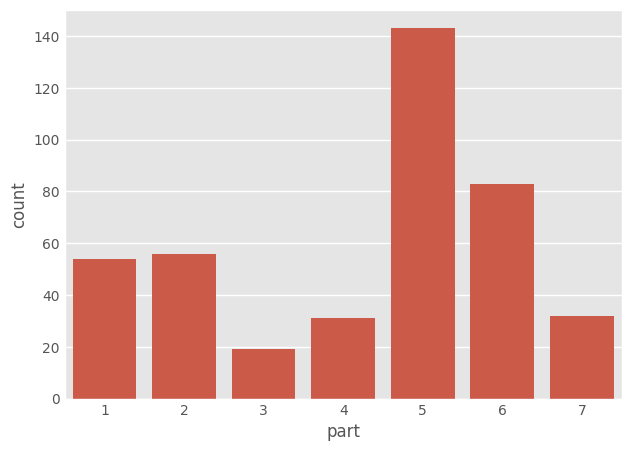

In [78]:
# Распределение лекций по разделам

ds = lectures.select('part').to_series().value_counts()

sns.barplot(data=ds, x='part', y='count')
plt.show()

# Анализ колонки task_container_id

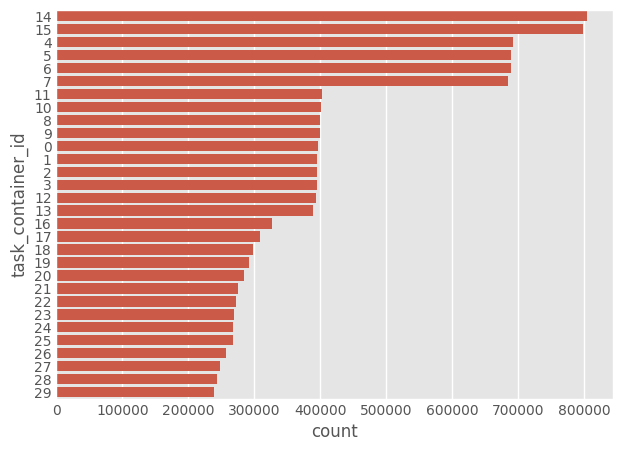

In [80]:
# Получение данных по топ-30 контейнерами с вопросами

ds = lf.select('task_container_id').collect(streaming=True).to_series().value_counts().sort(by='count', descending=True)
ds = ds[:30]
ds = ds.cast({'task_container_id': pl.String})
sns.barplot(data=ds, x='count', y='task_container_id')
plt.show()

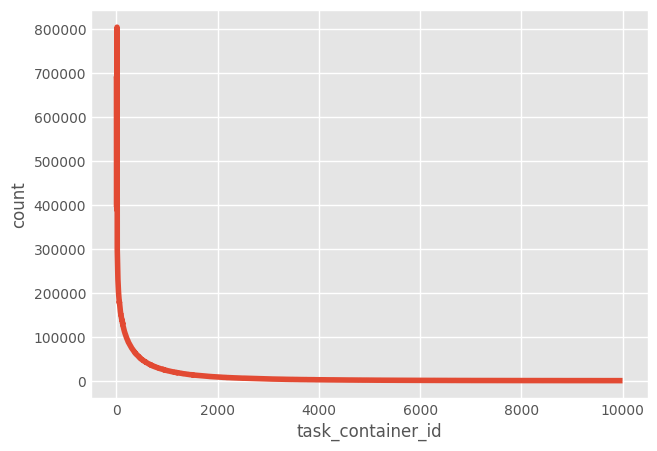

In [79]:
# Построение распределения по номеру task_container_id

ds = lf.select('task_container_id').collect(streaming=True).to_series().value_counts().sort(by='task_container_id')
sns.lineplot(data=ds, x='task_container_id', y='count')
plt.show()


# Анализ колонки user_answer

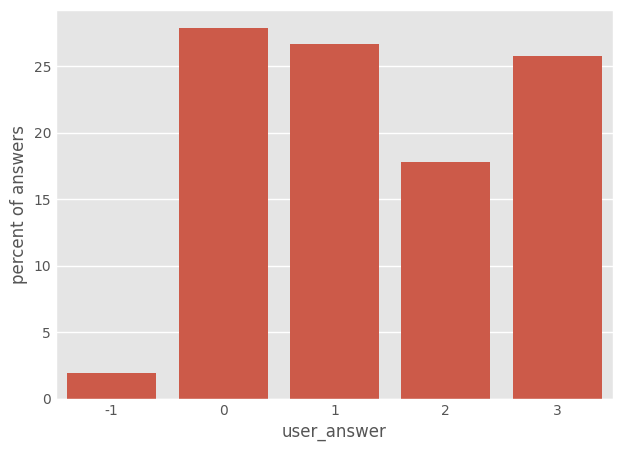

In [82]:
# Получение данных по выбранным вариантам ответа

ds = lf.select('user_answer').collect(streaming=True).to_series().value_counts().sort(by='user_answer')
ds = ds.with_columns(
    (pl.col('count') / num_rows * 100).alias('percent of answers') 
)
sns.barplot(data=ds, x='user_answer', y='percent of answers')
plt.show()


In [85]:
# Распределение долей правильных ответов в зависимости от выбранной опции в тесте

x = ds.select('user_answer').to_series()
idx = 0
for item in x:
    cnt = len(lf.filter(pl.col('user_answer') == item).collect(streaming=True))
    y = lf.filter(
        pl.col('user_answer') == item
    ).select(
        pl.col('answered_correctly')
    ).collect(streaming=True).to_series().value_counts().sort(by='answered_correctly').with_columns(
        (pl.col('count') / cnt * 100).alias('percent_of_answered_correctly') 
    )
    print(f'Вариант ответа - {item}')
    print(y)

Вариант ответа - -1
shape: (1, 3)
┌────────────────────┬─────────┬───────────────────────────────┐
│ answered_correctly ┆ count   ┆ percent_of_answered_correctly │
│ ---                ┆ ---     ┆ ---                           │
│ i8                 ┆ u32     ┆ f64                           │
╞════════════════════╪═════════╪═══════════════════════════════╡
│ -1                 ┆ 1959032 ┆ 100.0                         │
└────────────────────┴─────────┴───────────────────────────────┘
Вариант ответа - 0
shape: (2, 3)
┌────────────────────┬──────────┬───────────────────────────────┐
│ answered_correctly ┆ count    ┆ percent_of_answered_correctly │
│ ---                ┆ ---      ┆ ---                           │
│ i8                 ┆ u32      ┆ f64                           │
╞════════════════════╪══════════╪═══════════════════════════════╡
│ 0                  ┆ 9644707  ┆ 34.217483                     │
│ 1                  ┆ 18541782 ┆ 65.782517                     │
└───────────────

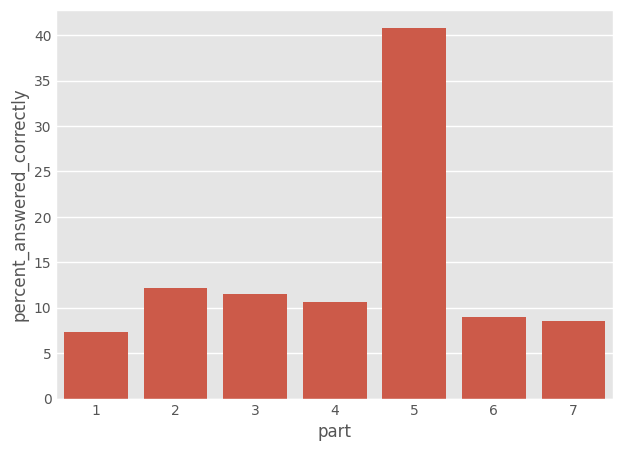

In [92]:
# Процент правильных ответов в зависимости от раздела


list_of_quest = lf.filter(
    (pl.col('answered_correctly') == 1) & (pl.col('content_type_id') == 0)
).select(
    pl.col('content_id')
).collect(streaming=True).to_series()

query = questions.filter(
    pl.col('question_id').is_in(list_of_quest)
).select(
    pl.col('part')
).to_series().value_counts()

query = query.with_columns(
    (pl.col('count') / pl.col('count').sum() * 100).alias('percent_answered_correctly')
).sort(by='part')

sns.barplot(data=query, x='part', y='percent_answered_correctly')
plt.show()

# Анализ колонки prior_question_elapsed_time

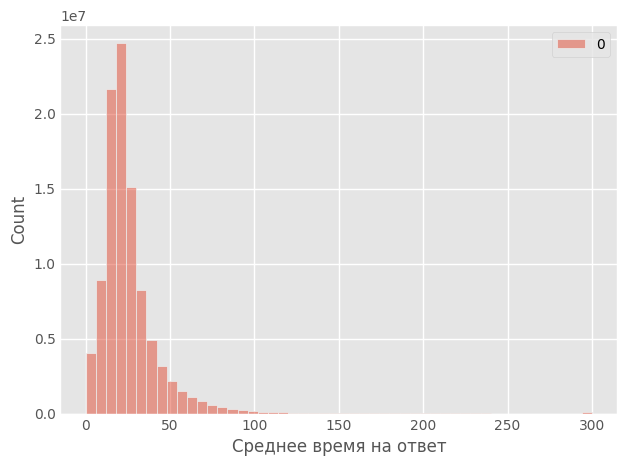

In [95]:
# Построение гистограммы среднего времени на ответ в секундах

ds = lf.select('prior_question_elapsed_time').collect(streaming=True) / 1000
sns.histplot(data=ds, bins=50)
plt.xlabel("Среднее время на ответ")
plt.show()

In [100]:
# Получение данных по порядковым статистикам для колонки prior_question_elapsed_time

ds = lf.with_columns(
    pl.col('prior_question_elapsed_time').min().alias('min'),
    pl.col('prior_question_elapsed_time').median().alias('median'),
    pl.col('prior_question_elapsed_time').max().alias('max'),
    pl.col('prior_question_elapsed_time').quantile(0.25).alias('1st quantile'),
    pl.col('prior_question_elapsed_time').quantile(0.75).alias('3rd quantile')
).select(
    pl.col('min'),
    pl.col('1st quantile'),
    pl.col('median'),
    pl.col('3rd quantile'),
    pl.col('max')
)
ds.collect(streaming=True).unique()

min,1st quantile,median,3rd quantile,max
f32,f32,f32,f32,f32
0.0,16000.0,21000.0,29666.0,300000.0
